In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up area: 2225.56 sq.ft. (206.76 sq.m.),3,3,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159


In [5]:
df.shape

(3803, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1187 non-null   float64
 15  carpet_area          1944 non-null   f

In [7]:
df.duplicated().sum()

124

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up area: 2225.56 sq.ft. (206.76 sq.m.),3,3,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159


<Axes: xlabel='property_type'>

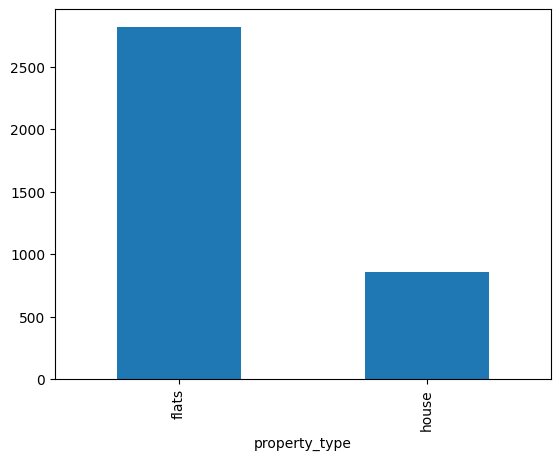

In [11]:
df['property_type'].value_counts().plot(kind='bar')

# Observations
- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

# society

In [12]:
df['society'].value_counts().shape

(676,)

In [13]:
df['society'].value_counts()

society
independent                                          486
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  43
dlf new town heights                                  42
signature global park                                 35
shree vardhman victoria                               34
smart world orchard                                   32
emaar mgf emerald floors premier                      32
paras dews                                            31
dlf the ultima                                        31
m3m woodshire                                         30
dlf regal gardens                                     30
smart world gems                                      29
shree vardhman flora                                  29
la vida by tata housing                               28
godrej nature plus                                    27
signature global solera

In [14]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023496
ss the leaf                             0.046366
shapoorji pallonji joyville gurugram    0.059837
dlf new town heights                    0.072995
signature global park                   0.083960
shree vardhman victoria                 0.094612
emaar mgf emerald floors premier        0.104637
smart world orchard                     0.114662
dlf the ultima                          0.124373
paras dews                              0.134085
dlf regal gardens                       0.143484
m3m woodshire                           0.152882
shree vardhman flora                    0.161967
smart world gems                        0.171053
la vida by tata housing                 0.179825
signature global solera                 0.188283
godrej nature plus                      0.196742
bptp terra                              0.204574
tata primanti                           0.212093
emaar gurgaon greens                    0.219612
vatika gurga

In [15]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

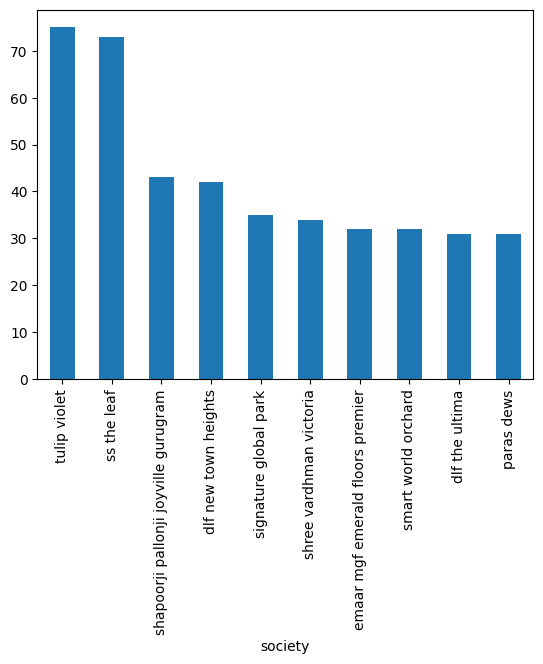

In [16]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [17]:
df['society'].isnull().sum()

1

In [18]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1388,flats,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


# Observations
- Around 13% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
  + Very High (>100): Only 1 society has more than 100 listings.
   + High (50-100): 2 societies have between 50 to 100 listings.
   + Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
   + Low (2-9): 273 societies have between 2 to 9 listings.
   + Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

# sector

In [19]:
# unique sectors
df['sector'].value_counts().shape

(114,)

<Axes: xlabel='sector'>

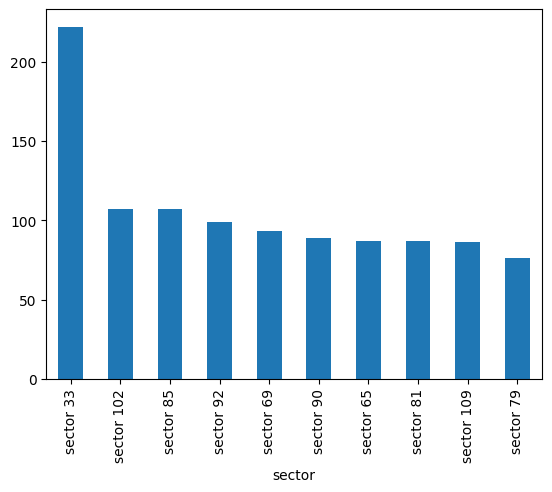

In [20]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [21]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 24,
 'Average (10-49)': 63,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

# Observations
- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
   + Very High (>100): 3 sectors have more than 100 listings.
   + High (50-100): 25 sectors have between 50 to 100 listings.
   + Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
   + Low (2-9): 16 sectors have between 2 to 9 listings.
   + Very Low (1): Interestingly, there are no sectors with only 1 listing.

# Price

In [23]:
df['price'].isnull().sum()

17

In [24]:
df['price'].describe()

count    3662.000000
mean        2.533132
std         2.979925
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

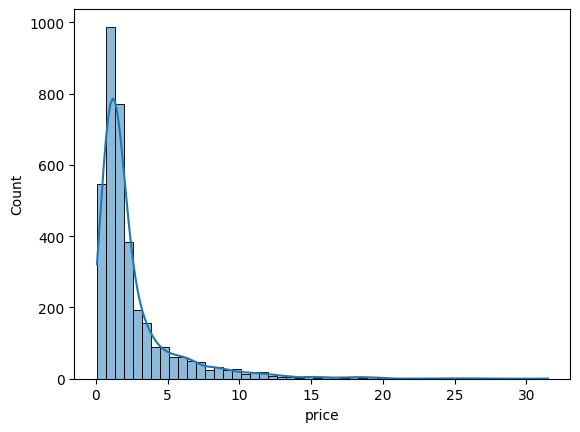

In [26]:
sn.histplot(df['price'], kde=True, bins=50)

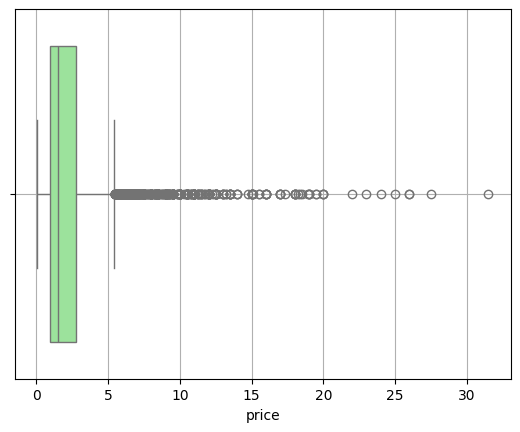

In [27]:
sn.boxplot(x=df['price'], color='lightgreen')
plt.grid()

# Descriptive Statistics:
- Count: There are 3,660 non-missing price entries.
- Mean Price: The average price is approximately 2.53 crores.
- Median Price: The median (or 50th percentile) price is 1.52 crores.
- Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
- Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
# Visualizations:

- Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

# Missing Values: There are 17 missing values in the price column.

In [30]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2801815052315617 14.942740165587002


# Skewness 
- The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

# Kurtosis
- The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [31]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.256
Name: price, dtype: float64

# Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [33]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [44]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [45]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [46]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

# Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

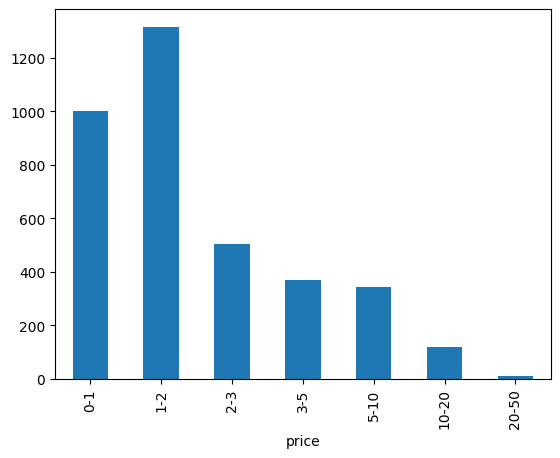

In [47]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

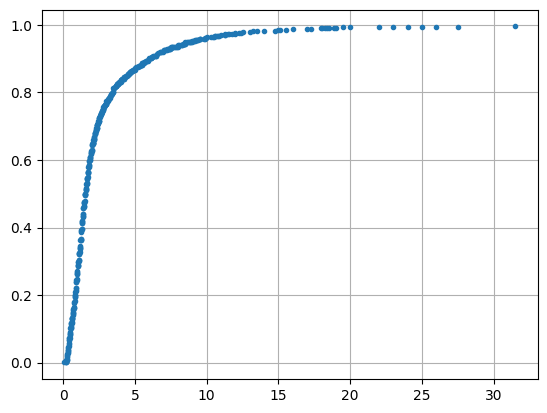

In [48]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

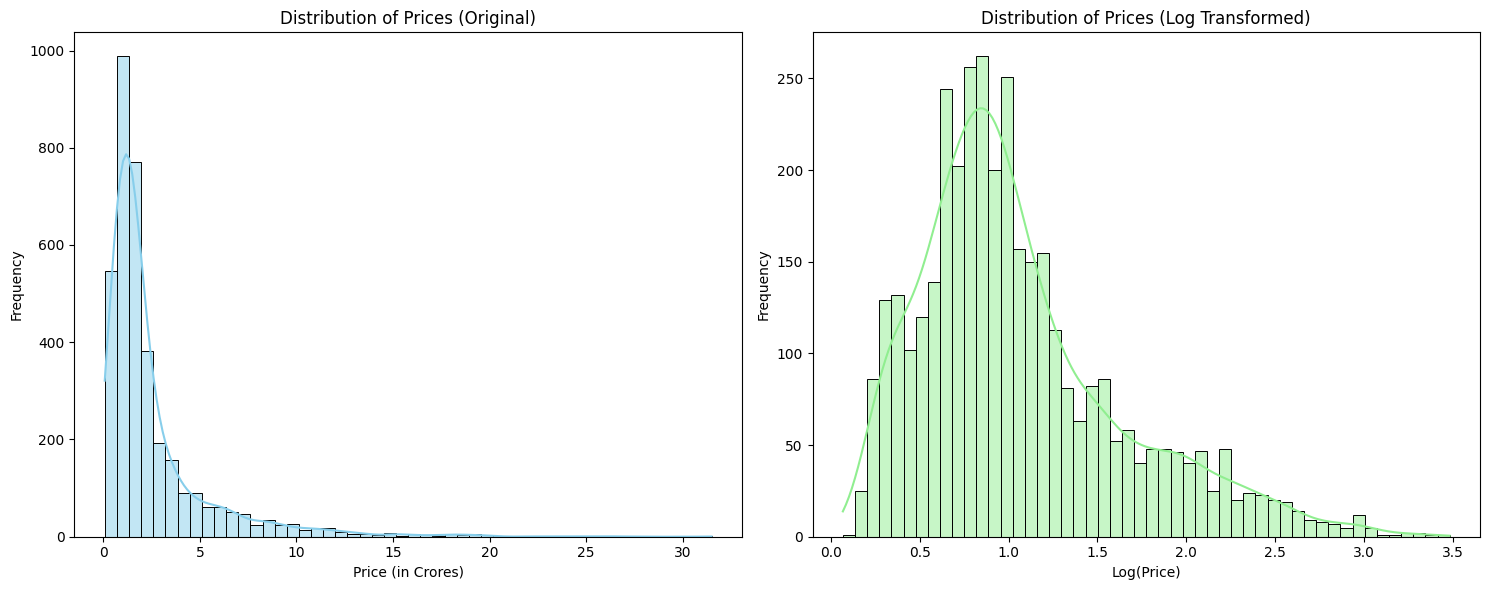

In [49]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sn.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sn.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [50]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0745168574382877 0.9665519721703988


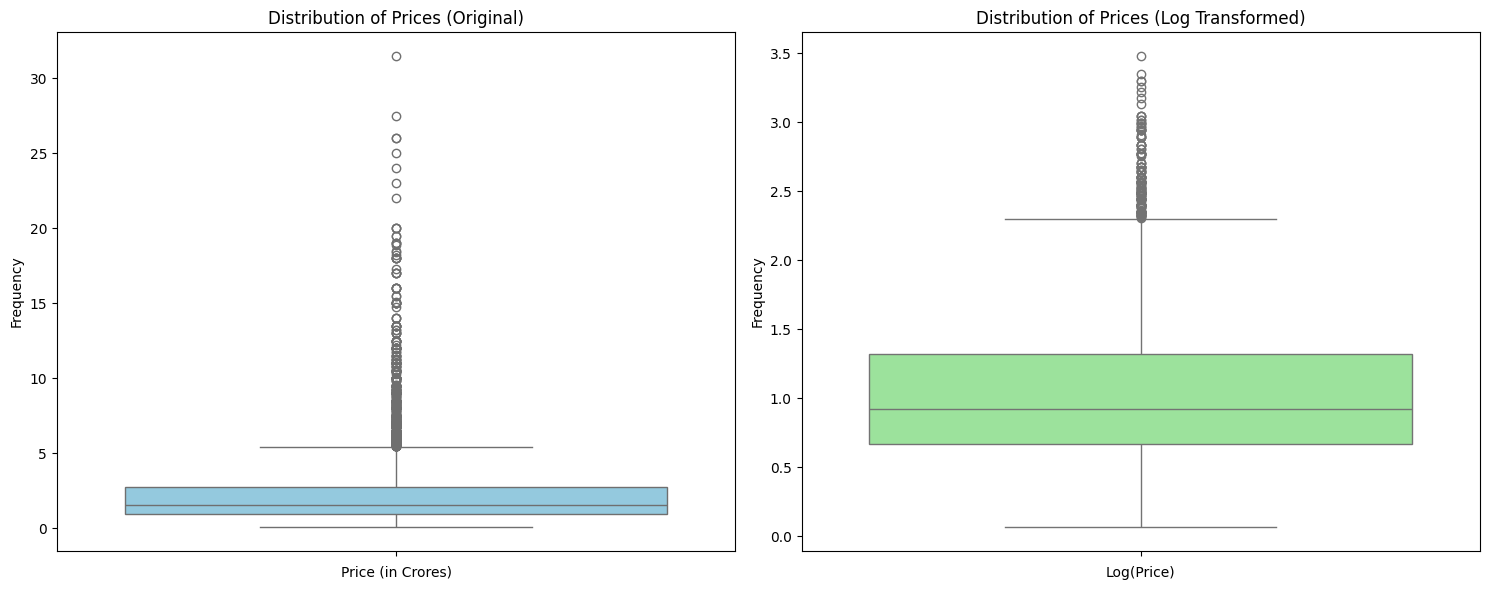

In [51]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sn.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sn.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# price_per_sqft

In [52]:
df['price_per_sqft'].isnull().sum()

17

In [53]:
df['price_per_sqft'].describe()

count      3662.000000
mean      13892.171764
std       23203.922374
min           4.000000
25%        6818.000000
50%        9020.000000
75%       13885.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

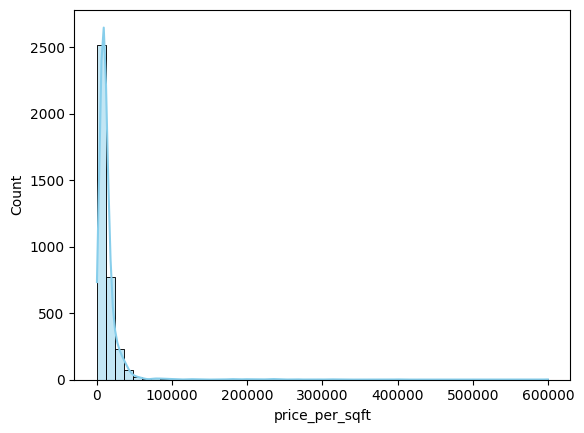

In [54]:
sn.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: ylabel='price_per_sqft'>

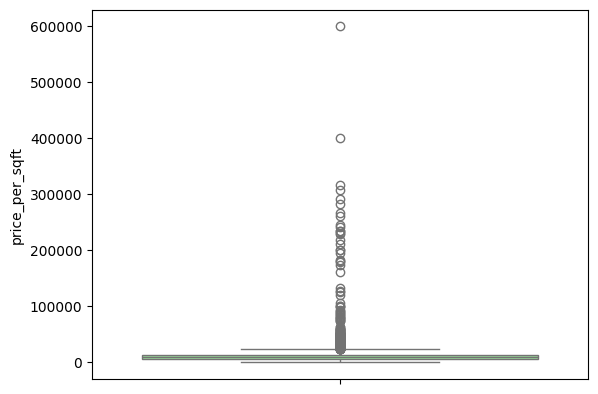

In [55]:
sn.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

# Observations
- Potential Outliers
- Right Skewed
- 17 missing values

# bedRoom

In [58]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

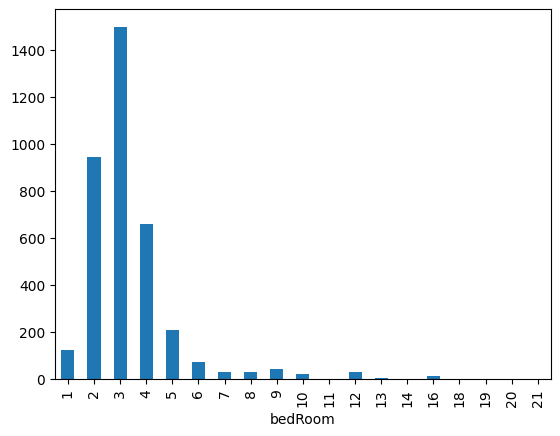

In [59]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

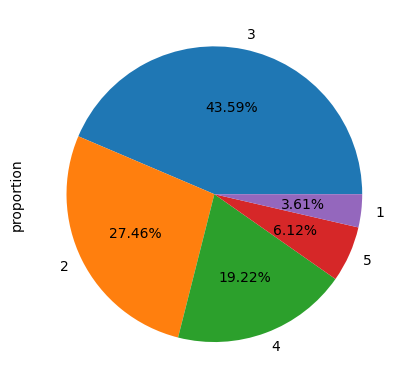

In [60]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# bathroom

In [61]:
df['bathroom'].isnull().sum()


0

<Axes: xlabel='bathroom'>

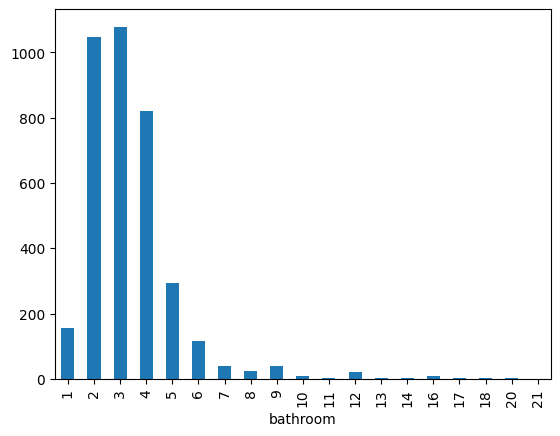

In [62]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='proportion'>

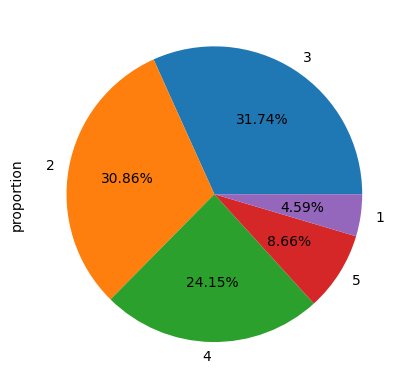

In [63]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [64]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up area: 2225.56 sq.ft. (206.76 sq.m.),3,3,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159


# balcony

In [65]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

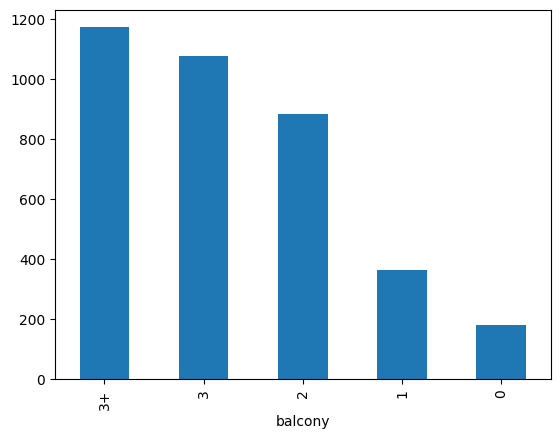

In [66]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

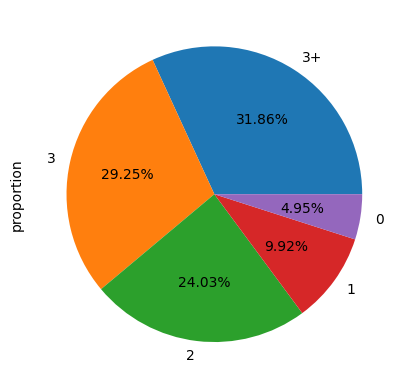

In [67]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [68]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159


# floor num

In [99]:
df['floorNum'].isnull().sum()

19

In [100]:
df['floorNum'].describe()

count    3660.000000
mean        6.797814
std         6.011249
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

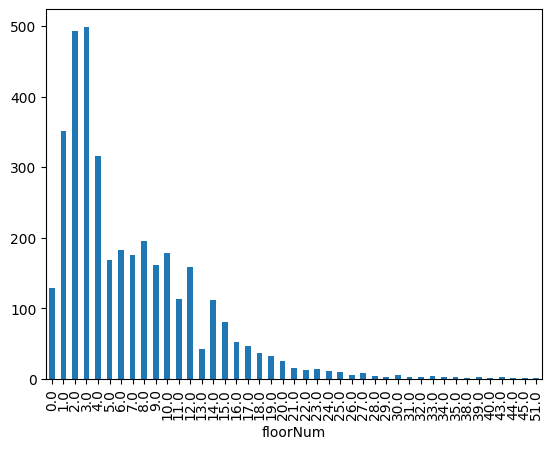

In [101]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

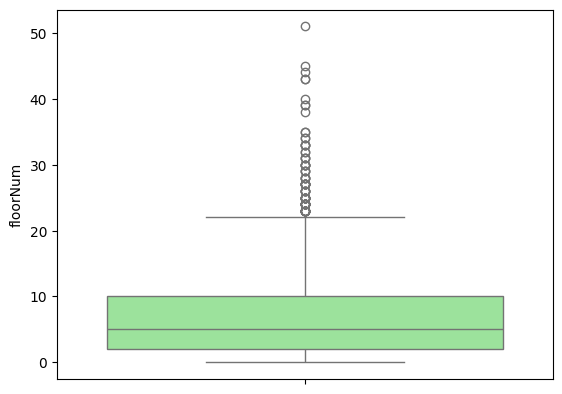

In [102]:
sn.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# facing

In [103]:
df['facing'].isnull().sum()

0

In [104]:
df['facing'].fillna('NA',inplace=True)

In [105]:
df['facing'].value_counts()

facing
NA            1047
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

# agePossession

In [106]:
df['agePossession'].isnull().sum()

0

In [107]:
df['agePossession'].value_counts()

agePossession
Relatively New        1647
New Property           594
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

# areas

In [108]:
# super built up area
df['super_built_up_area'].isnull().sum()

1804

In [109]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

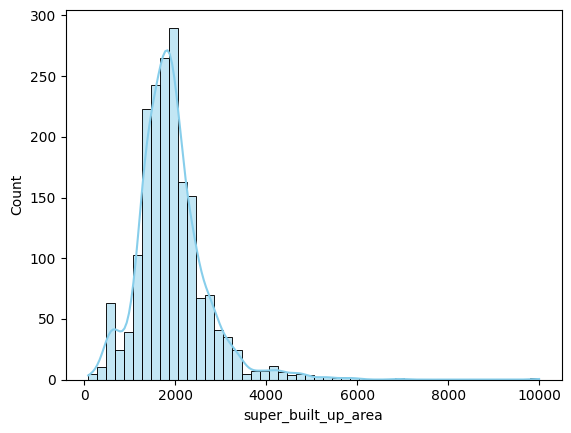

In [110]:
sn.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

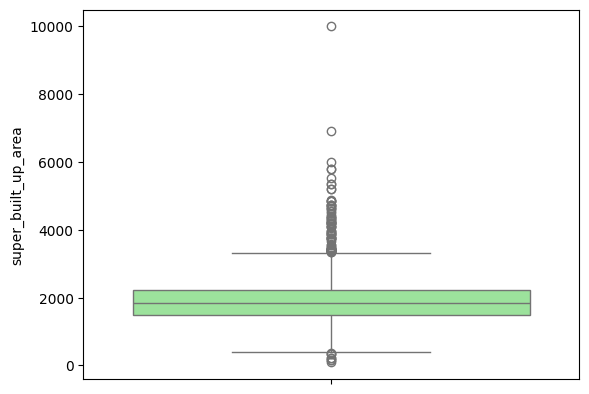

In [111]:
sn.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [112]:
# built up area
df['built_up_area'].isnull().sum()

2533

In [113]:
df['built_up_area'].describe()

count      1146.000000
mean       2433.345348
std       21760.584526
min          30.000000
25%        1121.250000
50%        1600.000000
75%        2060.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

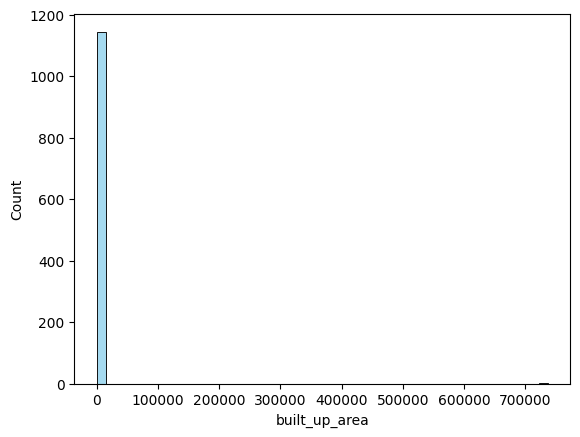

In [114]:
sn.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

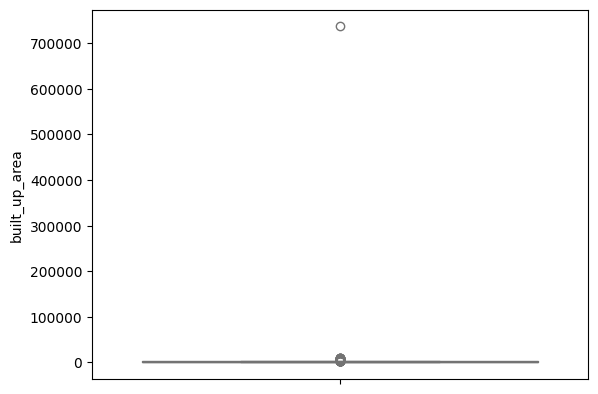

In [115]:
sn.boxplot(df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.

The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [116]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [117]:
df['carpet_area'].describe()

count      1874.000000
mean       2527.739615
std       22787.703018
min          15.000000
25%         845.000000
50%        1300.000000
75%        1788.750000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

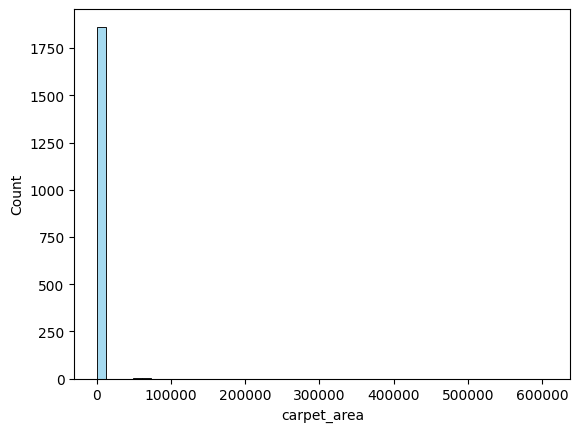

In [118]:
sn.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

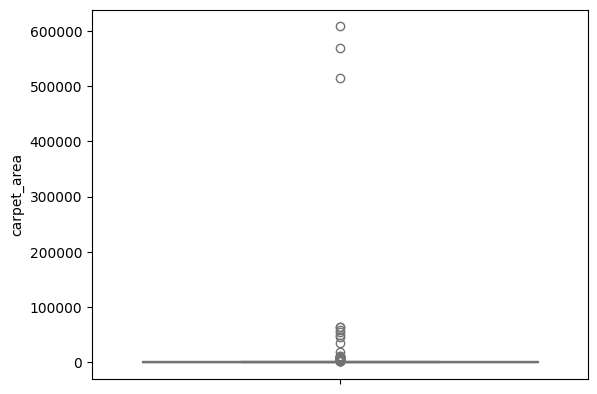

In [119]:
sn.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [120]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,1,1,1,1,0,2,153
1,0,1,1,0,0,2,151
2,0,1,0,0,0,0,117
3,0,1,0,0,0,0,7
4,0,0,0,0,0,2,159
5,1,1,0,1,0,0,49
6,0,0,0,0,0,2,158
7,0,0,0,0,0,0,66
8,0,1,0,0,0,0,95
9,0,0,0,0,0,0,24


# additional rooms


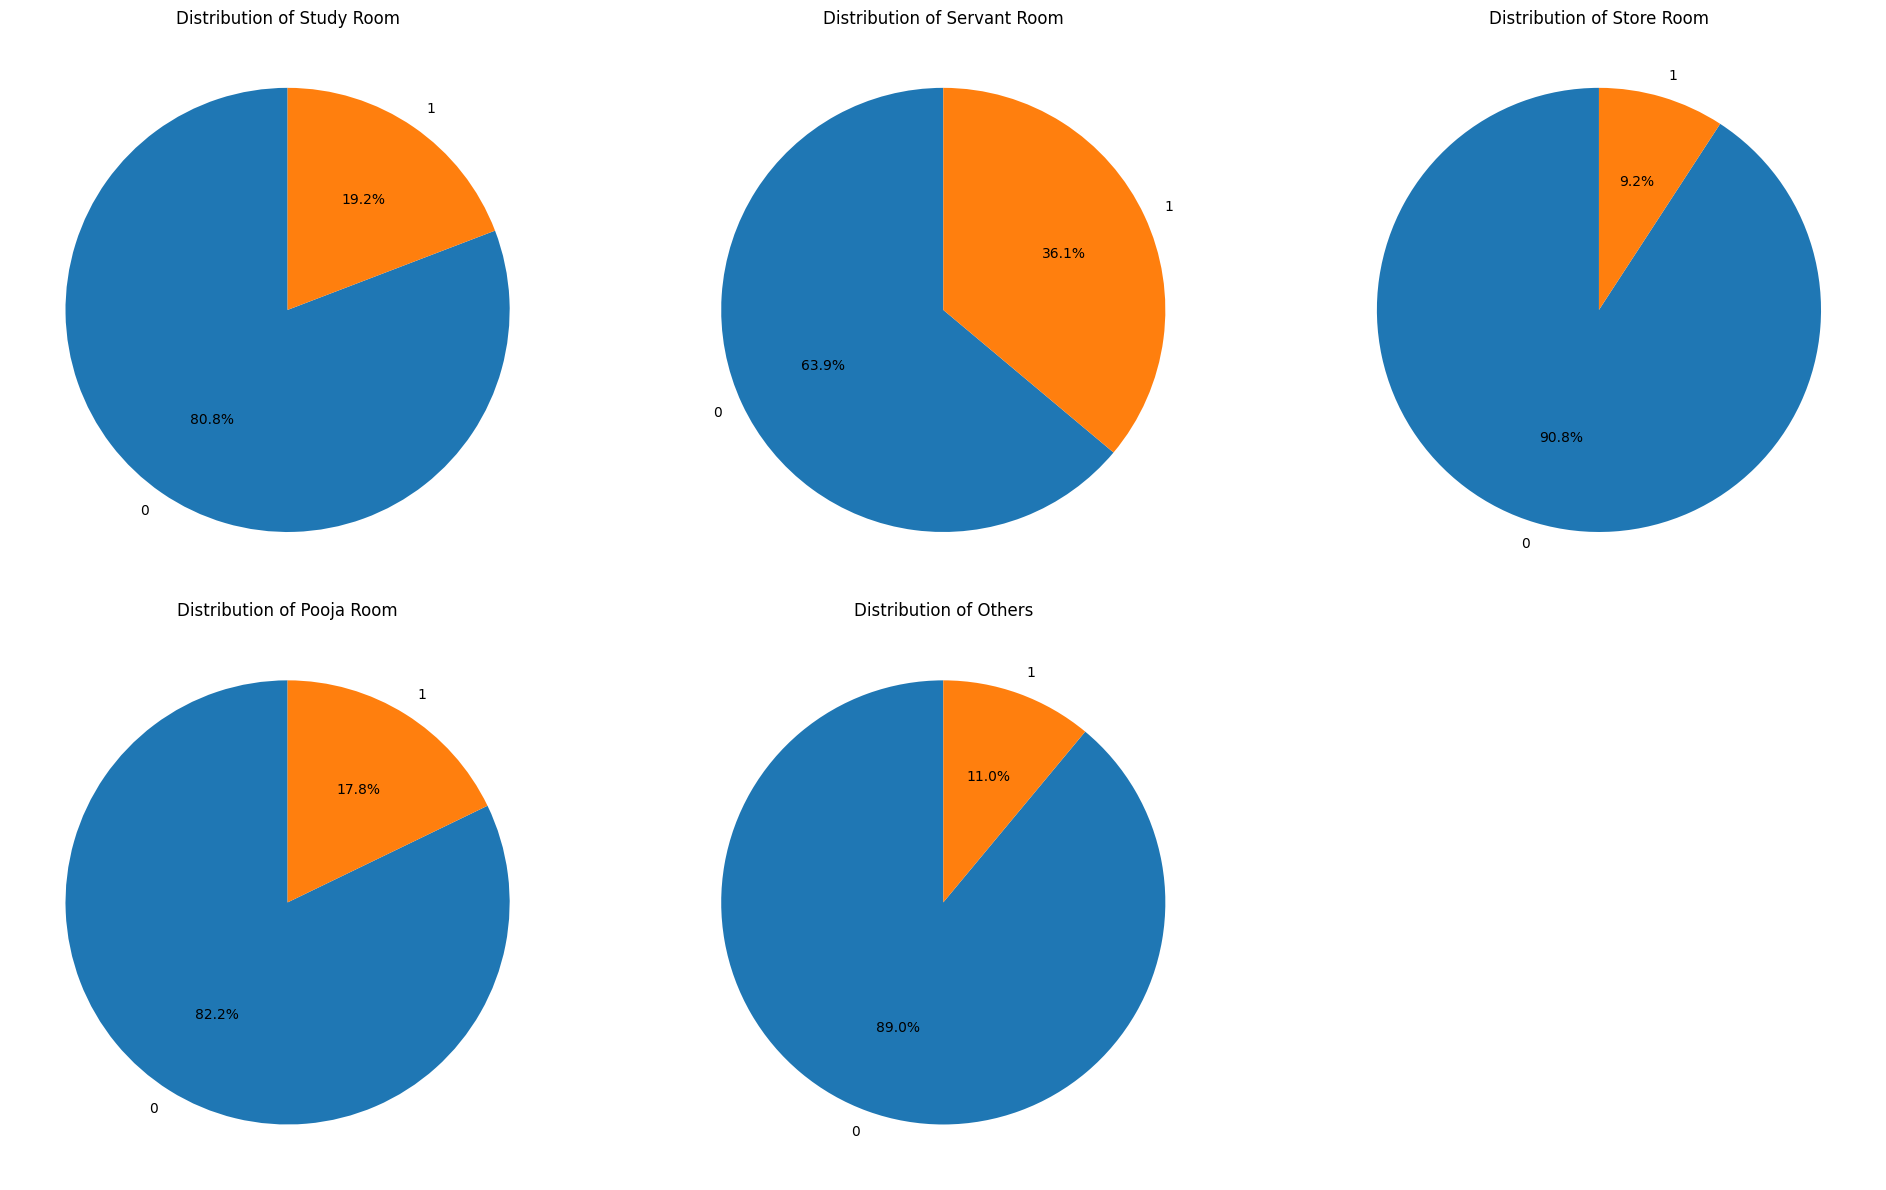

In [121]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# furnishing_type


In [122]:
df['furnishing_type'].value_counts()

furnishing_type
0    2438
2    1038
1     203
Name: count, dtype: int64

<Axes: ylabel='count'>

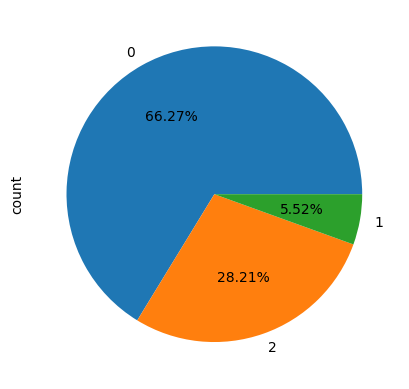

In [123]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# luxury score


In [124]:
df['luxury_score'].isnull().sum()

0

In [125]:
df['luxury_score'].describe()

count    3679.000000
mean       71.520522
std        53.046591
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

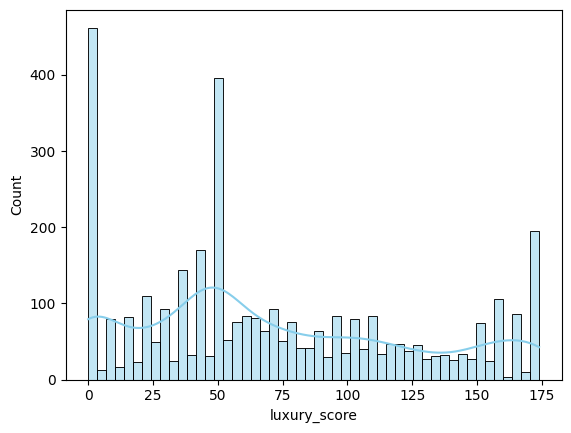

In [126]:
sn.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

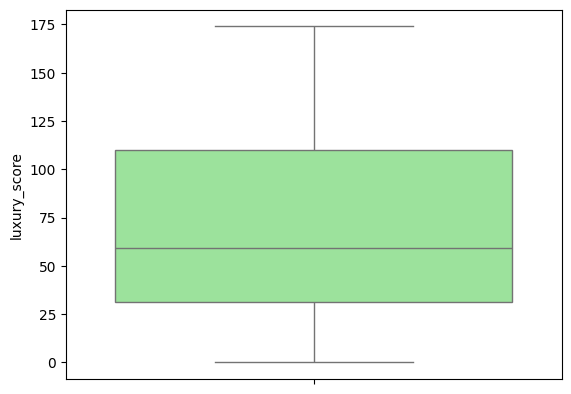

In [127]:
sn.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [128]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up area: 2225.56 sq.ft. (206.76 sq.m.),3,3,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159
